In [6]:
#Importing necessary libraries
from qiskit import *
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix, state_fidelity 
import numpy as np
from qiskit_aer import AerSimulator

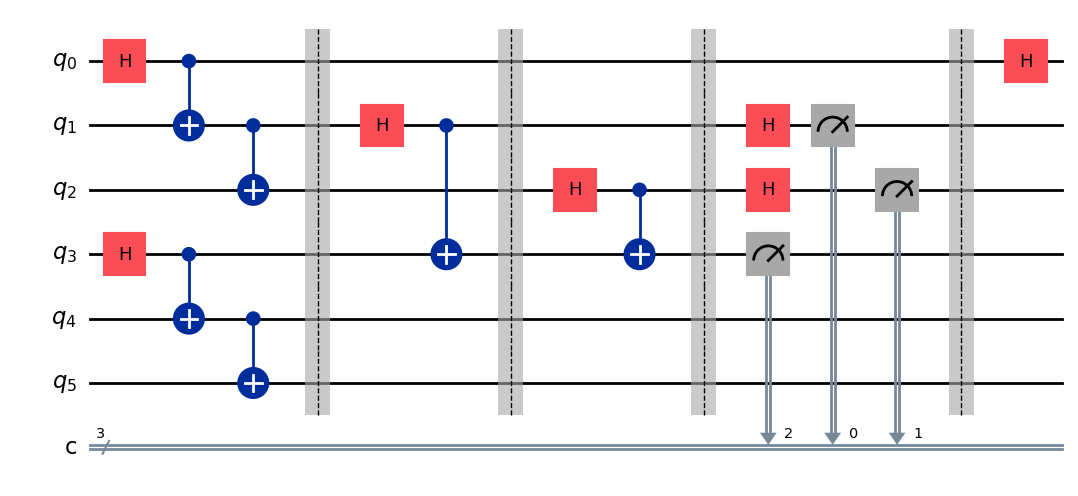

In [13]:
qc = QuantumCircuit(6,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.h(3)
qc.cx(3,4)
qc.cx(4,5)
qc.barrier()
qc.h(1)
qc.cx(1,3)
qc.barrier()
qc.h(2)
qc.cx(2,3)
qc.barrier()
qc.h(1)
qc.h(2)
qc.measure(1,0)
qc.measure(2,1)
qc.measure(3,2)
qc.barrier()
qc.h(0)
qc.draw('mpl')

In [14]:
qc.save_statevector(label="psi")

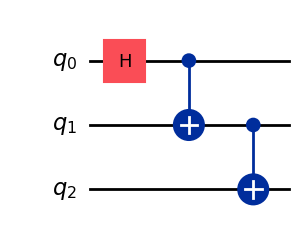

In [15]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
ghz.draw('mpl')

In [16]:
GHZ = Statevector.from_instruction(ghz)

In [17]:
sim = AerSimulator(
    method="statevector")

In [21]:
result = sim.run(qc).result()
psi = result.data(0)["psi"]

rho_end = partial_trace(DensityMatrix(psi), [1,2,3])

In [22]:
print(state_fidelity(rho_end, GHZ))

1.0
